<center><h2><b>Лабораторная работа № 7. Введение в работу с данными</b></h2></center>

<h3>Считывание данных</h3>

In [2]:
# Обновим окружение
using Pkg 
Pkg.update;

In [5]:
# Установка и запуск пакетов
using Pkg
    for p in ["CSV", "DataFrames", "RDatasets", "FileIO", "GLM"]
    Pkg.add(p)
end
Pkg.pin(PackageSpec(name="DataFrames", version="0.20.1"))

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
`DataFrames` is pinned at `v0.21.3`: maintaining pinned version
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
  Installed CodecZlib ───────── v0.6.0
  Installed Hwloc ───────────── v1.1.0
  Installed Compat ──────────── v3.24.0
  Installed StochasticDiffEq ── v6.27.0
  Installed DiffEqBas

In [6]:
using CSV, DataFrames, DelimitedFiles

<b>CSV - формат табличного представления данных, в котором ячейки разделены запятыми, а строки символом новой строки<br>
DelimitedFiles - файл, в котором информация может быть разделена различными разделителям<br>
DataFrame - фрагмент базы данных</b>

<br><b>Файл "programminglanguages.csv" мной не был найден, поэтому часть работы выполняется с подобным файлом</b>

In [7]:
# Считывание данных и их запись в структуру:
P = CSV.File("username.csv") |> DataFrame

5×4 DataFrame
│ Row │ Username  │  Identifier │ First name │ Last name │
│     │ String    │ Int64       │ String     │ String    │
├─────┼───────────┼─────────────┼────────────┼───────────┤
│ 1   │ booker12  │ 9012        │ rachel     │ Booker    │
│ 2   │ grey07    │ 2070        │ laura      │ Grey      │
│ 3   │ johnson81 │ 4081        │ craig      │ Johnson   │
│ 4   │ jenkins46 │ 9346        │ mary       │ Jenkins   │
│ 5   │ smith79   │ 5079        │ jamie      │ Smith     │

<b>Напишем функцию нахождения фамилии человека по его имени</b>

In [8]:
# Функция определения фамилии по отчеству
function name_2_swissname(P, name::String)
    row = findfirst(P[:,3] .== name)
    return P[row, 4]
end;

In [9]:
# Пример вызова функции и определение даты создания языка Julia:
name_2_swissname(P, "mary")

"Jenkins"

<b>Если мы попробуем найти человека по имени LAURA, набрав его имя верхним регистром, наша функция выдаст ошибку. Для того чтобы её решить, необходимо функцию преобразовать:</b>

In [10]:
function name_2_swissname(P, name::String)
    row = findfirst(P[:,3] .== lowercase.(name))
    return P[row, 4]
end;

In [11]:
name_2_swissname(P, "LAURA")

"Grey"

<b>Можно считывать данные построчно, с элементами, разделенными заданным разделителем:</b>

In [12]:
# Построчное считывание данных с указанием разделителя:
Tx = readdlm("username.csv", ',')

6×4 Array{Any,2}:
 "Username"       " Identifier"  "First name"  "Last name"
 "booker12"   9012               "rachel"      "Booker"
 "grey07"     2070               "laura"       "Grey"
 "johnson81"  4081               "craig"       "Johnson"
 "jenkins46"  9346               "mary"        "Jenkins"
 "smith79"    5079               "jamie"       "Smith"

<br><h3><b>Запись данных в файл</b></h3>

<b>Предположим, что требуется записать имеющиеся данные в файл. Для записи данных
в формате CSV можно воспользоваться следующим вызовом:</b>

In [21]:
# Запись данных в CSV-файл:
CSV.write("username_2.csv", P)
# Посмотрим файл
P = CSV.File("username_2.csv") |> DataFrame

5×4 DataFrame
│ Row │ Username  │  Identifier │ First name │ Last name │
│     │ String    │ Int64       │ String     │ String    │
├─────┼───────────┼─────────────┼────────────┼───────────┤
│ 1   │ booker12  │ 9012        │ rachel     │ Booker    │
│ 2   │ grey07    │ 2070        │ laura      │ Grey      │
│ 3   │ johnson81 │ 4081        │ craig      │ Johnson   │
│ 4   │ jenkins46 │ 9346        │ mary       │ Jenkins   │
│ 5   │ smith79   │ 5079        │ jamie      │ Smith     │

<b>Работа с разделителем:</b>

In [9]:
writedlm("username_2.txt", Tx, '-') # Запись данных в текстовый файл с разделителем '-'
P_new_delim = readdlm("username_2.txt", '-') # Построчное считывание данных с указанием разделителя

6×4 Array{Any,2}:
 "Username"       " Identifier"  "First name"  "Last name"
 "booker12"   9012               "rachel"      "Booker"
 "grey07"     2070               "laura"       "Grey"
 "johnson81"  4081               "craig"       "Johnson"
 "jenkins46"  9346               "mary"        "Jenkins"
 "smith79"    5079               "jamie"       "Smith"

<br><h3><b>Словари</b></h3>

<b>При работе с данными бывает удобно записать их в формате словаря<br>
При инициализации словаря можно задать конкретные типы данных для ключей
и значений:</b>

In [27]:
dict = Dict{Integer,Vector{String}}() # Инициализация словаря:
dict2 = Dict() # Инициализация словаря без структуры

Dict{Any,Any}()

<b>Заполним словарь данными типа id -> username</b>

In [28]:
# Заполнение словаря данными:
for x in eachrow(P)
    dict2[x[2]] = x[1]
end

In [29]:
dict2 |> println # Посмотрим словарь:

Dict{Any,Any}(5079 => "smith79",2070 => "grey07",4081 => "johnson81",9346 => "jenkins46",9012 => "booker12")


<br><h3><b>DataFrames</b></h3>

In [13]:
# Подгружаем пакет DataFrames:
using DataFrames

<b>Работа с данными, записанными в структуре DataFrame , позволяет использовать индек-
сацию и получить доступ к столбцам по заданному имени заголовка или по индексу
столбца</b>

In [14]:
# Задаём переменную со структурой DataFrame:
df = DataFrame(id = P[:, 2], uname = P[:,1])

5×2 DataFrame
│ Row │ id    │ uname     │
│     │ Int64 │ String    │
├─────┼───────┼───────────┤
│ 1   │ 9012  │ booker12  │
│ 2   │ 2070  │ grey07    │
│ 3   │ 4081  │ johnson81 │
│ 4   │ 9346  │ jenkins46 │
│ 5   │ 5079  │ smith79   │

In [15]:
# Вывод всех значения столбца year:
df[!,:uname]

5-element Array{String,1}:
 "booker12"
 "grey07"
 "johnson81"
 "jenkins46"
 "smith79"

In [16]:
# Получение статистических сведений о фрейме:
describe(df)

2×8 DataFrame. Omitted printing of 1 columns
│ Row │ variable │ mean   │ min      │ median │ max     │ nunique │ nmissing │
│     │ Symbol   │ Union… │ Any      │ Union… │ Any     │ Union…  │ Nothing  │
├─────┼──────────┼────────┼──────────┼────────┼─────────┼─────────┼──────────┤
│ 1   │ id       │ 5917.6 │ 2070     │ 5079.0 │ 9346    │         │          │
│ 2   │ uname    │        │ booker12 │        │ smith79 │ 5       │          │

<br><h3><b>RDatasets</b></h3>

In [1]:
# Подгружаем пакет RDatasets:
using RDatasets

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


<b>С данными можно работать также как с наборами данных через пакет RDatasets языка R:</b>

In [32]:
# Задаём структуру данных в виде набора данных:
iris = dataset("datasets", "iris")

150×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species   │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Cat…      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ setosa    │
⋮
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ virginica │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ virginica │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ virginica │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ virginica │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ virginica │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ virginica │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ virginica │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ virginica │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ virginica │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ virginica │

In [19]:
# Определения типа переменной:
typeof(iris)

DataFrame

In [20]:
# Получение статистических сведений
describe(iris)

5×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable    │ mean    │ min    │ median │ max       │ nunique │
│     │ Symbol      │ Union…  │ Any    │ Union… │ Any       │ Union…  │
├─────┼─────────────┼─────────┼────────┼────────┼───────────┼─────────┤
│ 1   │ SepalLength │ 5.84333 │ 4.3    │ 5.8    │ 7.9       │         │
│ 2   │ SepalWidth  │ 3.05733 │ 2.0    │ 3.0    │ 4.4       │         │
│ 3   │ PetalLength │ 3.758   │ 1.0    │ 4.35   │ 6.9       │         │
│ 4   │ PetalWidth  │ 1.19933 │ 0.1    │ 1.3    │ 2.5       │         │
│ 5   │ Species     │         │ setosa │        │ virginica │ 3       │

<br><h3><b>Работа с переменными отсутствующего типа (Missing Values)</b></h3><br><b>Пакет DataFrames позволяет использовать так называемый «отсутствующий» тип:</b>

In [21]:
# Отсутствующий тип:
a = missing
typeof(a)

Missing

<b>В операции сложения числа и переменной с отсутствующим типом значение также
будет иметь отсутствующий тип:</b>

In [22]:
# Пример операции с переменной отсутствующего типа:
a + 1

missing

<b>Приведём пример работы с данными, среди которых есть данные с отсутствующим
типом.</b>

In [23]:
# Определение перечня продуктов:
foods = ["apple", "cucumber", "tomato", "banana"]
# Определение калорий:
calories = [missing,47,22,105];

In [24]:
# Определение типа переменной:
typeof(calories)

Array{Union{Missing, Int64},1}

In [25]:
# Подключаем пакет Statistics:
using Statistics
# Определение среднего значения:
mean(calories)

missing

<b>Для решения этой проблемы необходимо игнорировать отсутствующий тип:</b>

In [26]:
# Определение среднего значения без значений с отсутствующим типом:
mean(skipmissing(calories))

58.0

<b>Далее показано, как можно сформировать таблицы данных и объединить их в один
фрейм:</b>

In [27]:
# Задание сведений о ценах:
prices = [0.85,1.6,0.8,0.6]
# Формирование данных о калориях:
dataframe_calories = DataFrame(item=foods,calories=calories)

4×2 DataFrame
│ Row │ item     │ calories │
│     │ String   │ Int64?   │
├─────┼──────────┼──────────┤
│ 1   │ apple    │ missing  │
│ 2   │ cucumber │ 47       │
│ 3   │ tomato   │ 22       │
│ 4   │ banana   │ 105      │

In [28]:
# Формирование данных о ценах:
dataframe_prices = DataFrame(item=foods,price=prices)

4×2 DataFrame
│ Row │ item     │ price   │
│     │ String   │ Float64 │
├─────┼──────────┼─────────┤
│ 1   │ apple    │ 0.85    │
│ 2   │ cucumber │ 1.6     │
│ 3   │ tomato   │ 0.8     │
│ 4   │ banana   │ 0.6     │

In [29]:
# Объединение данных о калориях и ценах:
DF = innerjoin(dataframe_calories,dataframe_prices,on=:item)

4×3 DataFrame
│ Row │ item     │ calories │ price   │
│     │ String   │ Int64?   │ Float64 │
├─────┼──────────┼──────────┼─────────┤
│ 1   │ apple    │ missing  │ 0.85    │
│ 2   │ cucumber │ 47       │ 1.6     │
│ 3   │ tomato   │ 22       │ 0.8     │
│ 4   │ banana   │ 105      │ 0.6     │

<br><h3><b>FileIO</b></h3>

<b>В Julia можно работать с так называемыми «сырыми» данными, используя пакет FileIO :</b>

In [30]:
# Подключаем пакет FileIO:
using FileIO

<b>Попробуем посмотреть, как Julia работает с изображениями.
Подключим соответствующий пакет:</b>

In [31]:
# Подключаем пакет ImageIO:
import Pkg
Pkg.add("ImageIO")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %  60.3 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [32]:
# Загрузка изображения:
X1 = load("julialogo.png")

┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278


175×302 Array{RGBA{N0f8},2} with eltype ColorTypes.RGBA{FixedPointNumbers.Normed{UInt8,8}}:
 RGBA{N0f8}(1.0,1.0,1.0,1.0)  …  RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)  …  RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)  …  RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 ⋮                            ⋱  
 RGBA{N0f8}(1.0,1.0,1.0,1.0)     RGBA{N0f8}(1.0,1.0,1.0,1.0)
 RGBA{N0f8}(1.0,1.0,

In [33]:
# Определение типа и размера данных:
@show typeof(X1);
@show size(X1);

typeof(X1) = Array{ColorTypes.RGBA{FixedPointNumbers.Normed{UInt8,8}},2}
size(X1) = (175, 302)


<br><b><h2>Обработка данных: стандартные алгоритмы машинного
обучения в Julia</h2><h3>Кластеризация данных. Метод k-средних</h3></b>

In [34]:
using DataFrames, CSV, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


<b>Задача кластеризации данных заключается в формировании однородной группы упоря-
доченных по какому-то признаку данных.
Метод k-средних позволяет минимизировать суммарное квадратичное отклонение
точек кластеров от центров этих кластеров:</b>

In [35]:
# Загрузка данных:
houses = CSV.File("houses.csv") |> DataFrame

985×12 DataFrame. Omitted printing of 8 columns
│ Row │ street                          │ city            │ zip   │ state  │
│     │ String                          │ String          │ Int64 │ String │
├─────┼─────────────────────────────────┼─────────────────┼───────┼────────┤
│ 1   │ 3526 HIGH ST                    │ SACRAMENTO      │ 95838 │ CA     │
│ 2   │ 51 OMAHA CT                     │ SACRAMENTO      │ 95823 │ CA     │
│ 3   │ 2796 BRANCH ST                  │ SACRAMENTO      │ 95815 │ CA     │
│ 4   │ 2805 JANETTE WAY                │ SACRAMENTO      │ 95815 │ CA     │
│ 5   │ 6001 MCMAHON DR                 │ SACRAMENTO      │ 95824 │ CA     │
│ 6   │ 5828 PEPPERMILL CT              │ SACRAMENTO      │ 95841 │ CA     │
│ 7   │ 6048 OGDEN NASH WAY             │ SACRAMENTO      │ 95842 │ CA     │
│ 8   │ 2561 19TH AVE                   │ SACRAMENTO      │ 95820 │ CA     │
│ 9   │ 11150 TRINITY RIVER DR Unit 114 │ RANCHO CORDOVA  │ 95670 │ CA     │
│ 10  │ 7325 10TH ST                    │ RIO LINDA       │ 95673 │ CA     │
⋮
│ 975 │ 7540 HICKORY AVE                │ ORANGEVALE      │ 95662 │ CA     │
│ 976 │ 5024 CHAMBERLIN CIR             │ ELK GROVE       │ 95757 │ CA     │
│ 977 │ 2400 INVERNESS DR               │ LINCOLN         │ 95648 │ CA     │
│ 978 │ 5 BISHOPGATE CT                 │ SACRAMENTO      │ 95823 │ CA     │
│ 979 │ 5601 REXLEIGH DR                │ SACRAMENTO      │ 95823 │ CA     │
│ 980 │ 1909 YARNELL WAY                │ ELK GROVE       │ 95758 │ CA     │
│ 981 │ 9169 GARLINGTON CT              │ SACRAMENTO      │ 95829 │ CA     │
│ 982 │ 6932 RUSKUT WAY                 │ SACRAMENTO      │ 95823 │ CA     │
│ 983 │ 7933 DAFFODIL WAY               │ CITRUS HEIGHTS  │ 95610 │ CA     │
│ 984 │ 8304 RED FOX WAY                │ ELK GROVE       │ 95758 │ CA     │
│ 985 │ 3882 YELLOWSTONE LN             │ EL DORADO HILLS │ 95762 │ CA     │

<b>Построим график цен на недвижимость в зависимости от площади (рис. 7.1):</b>

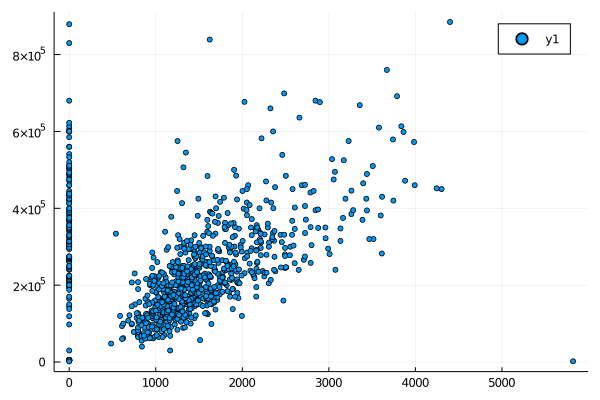

In [36]:
# Построение графика:
using Plots
plot(size=(500,500),leg=false)
x = houses[!,:sqft]
y = houses[!,:price]
scatter(x,y,markersize=3)

<b>Как видно из графика, имеются так называемые «артефакты», т.е. проявля-
ются отсутствующие или невозможные сведения в исходных данных, например, цены на
недвижимость нулевой площади.
Для того чтобы избавиться от такого эффекта, можно отфильтровать и исключить такие
значения, получить более корректный график цен:</b>

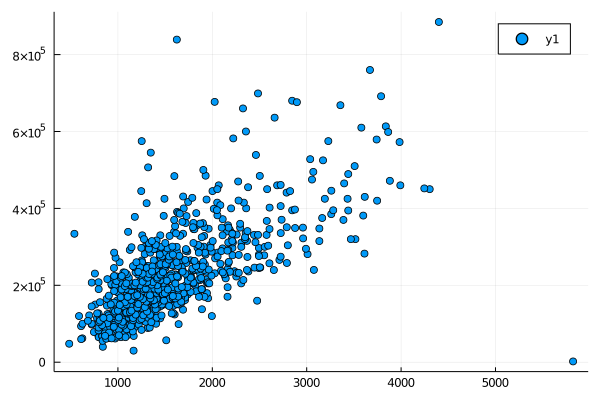

In [37]:
# Фильтрация данных по заданному условию:
filter_houses = houses[houses[!,:sqft].>0,:]
# Построение графика:
x = filter_houses[!,:sqft]
y = filter_houses[!,:price]
scatter(x,y)

<b>Используя для фильтрации значений функцию by пакета DataFrames и для вычисления
среднего значения функцию mean пакета Statistics , можно посмотреть среднюю цену
домов определённого типа:</b>

In [38]:
# Подключение пакета Statistics:
using Statistics

In [39]:
# Определение средней цены для определённого типа домов:
by(filter_houses,:type,filter_houses->mean(filter_houses[!,:price]))

3×2 DataFrame
│ Row │ type         │ x1       │
│     │ String       │ Float64  │
├─────┼──────────────┼──────────┤
│ 1   │ Residential  │ 234802.0 │
│ 2   │ Condo        │ 134213.0 │
│ 3   │ Multi-Family │ 224535.0 │

<b>Отфильтровав таким образом данные, можно приступить к формированию кластеров.
Сначала подключаем необходимые пакеты и формируем данные в нужном виде:</b>

In [40]:
# Подключение пакета Clustering:
import Pkg
Pkg.add("Clustering")
using Clustering
# Добавление данных :latitude и :longitude в новый фрейм:
X = filter_houses[[:latitude,:longitude]]
# Конвертация данных в матричный вид:
X = convert(Matrix{Float64}, X)

  Resolving package versions...
  Installed NearestNeighbors ─ v0.4.8
  Installed Clustering ─────── v0.14.2
Updating `~/.julia/environments/v1.5/Project.toml`
  [aaaa29a8] + Clustering v0.14.2
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [aaaa29a8] + Clustering v0.14.2
  [b8a86587] + NearestNeighbors v0.4.8
┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1278


814×2 Array{Float64,2}:
 38.6319  -121.435
 38.4789  -121.431
 38.6183  -121.444
 38.6168  -121.439
 38.5195  -121.436
 38.6626  -121.328
 38.6817  -121.352
 38.5351  -121.481
 38.6212  -121.271
 38.7009  -121.443
 38.6377  -121.452
 38.4707  -121.459
 38.6187  -121.436
  ⋮       
 38.7035  -121.375
 38.7031  -121.235
 38.3898  -121.446
 38.8978  -121.325
 38.4679  -121.445
 38.4453  -121.442
 38.4174  -121.484
 38.4577  -121.36
 38.4999  -121.459
 38.7088  -121.257
 38.417   -121.397
 38.6552  -121.076

<b>Каждая функция хранится в виде строки X , но можно транспонировать получившуюся
матрицу, чтобы иметь возможность работать с столбцами данных X :</b>

In [41]:
# Транспонирование матрицы с данными:
X = X'

2×814 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
   38.6319    38.4789    38.6183  …    38.7088    38.417    38.6552
 -121.435   -121.431   -121.444      -121.257   -121.397  -121.076

<b>В качестве критерия для формирования кластеров данных и определения количества
кластеров попробуем использовать количество почтовых индексов:</b>

In [42]:
# Задание количества кластеров:
k = length(unique(filter_houses[!,:zip]))

66

In [43]:
# Определение k-среднего:
C = kmeans(X,k)

KmeansResult{Array{Float64,2},Float64,Int64}([38.661604 38.39207596153847 … 38.58451559999999 38.416906000000004; -121.09161019999999 -121.4404955 … -121.4052738 -121.4079011], [39, 27, 19, 39, 48, 20, 63, 60, 28, 62  …  2, 21, 58, 14, 15, 35, 6, 40, 66, 1], [2.9145121516194195e-6, 0.00038124824641272426, 0.00026957829686580226, 0.00024293130991281942, 0.00013767851487500593, 0.00019668310414999723, 0.00010897021638811566, 0.0002096940079354681, 1.144897032645531e-5, 0.0005736209350288846  …  3.845047467621043e-5, 5.241325561655685e-5, 9.021900041261688e-5, 0.0002432598776067607, 0.00013415837747743353, 5.249940659268759e-5, 2.7903453883482143e-5, 0.0005266233965812717, 0.00010977845886372961, 0.00028677618320216425], [10, 26, 17, 8, 4, 19, 13, 14, 3, 12  …  1, 17, 3, 25, 11, 22, 18, 15, 10, 10], [10, 26, 17, 8, 4, 19, 13, 14, 3, 12  …  1, 17, 3, 25, 11, 22, 18, 15, 10, 10], 0.21574653499556007, 10, true)

In [45]:
# Формирование фрейма данных:
df = DataFrame(cluster = C.assignments,city = filter_houses[!,:city],
latitude = filter_houses[!,:latitude],longitude = filter_houses[!,:longitude],zip = filter_houses[!,:zip])

814×5 DataFrame
│ Row │ cluster │ city            │ latitude │ longitude │ zip   │
│     │ Int64   │ String          │ Float64  │ Float64   │ Int64 │
├─────┼─────────┼─────────────────┼──────────┼───────────┼───────┤
│ 1   │ 39      │ SACRAMENTO      │ 38.6319  │ -121.435  │ 95838 │
│ 2   │ 27      │ SACRAMENTO      │ 38.4789  │ -121.431  │ 95823 │
│ 3   │ 19      │ SACRAMENTO      │ 38.6183  │ -121.444  │ 95815 │
│ 4   │ 39      │ SACRAMENTO      │ 38.6168  │ -121.439  │ 95815 │
│ 5   │ 48      │ SACRAMENTO      │ 38.5195  │ -121.436  │ 95824 │
│ 6   │ 20      │ SACRAMENTO      │ 38.6626  │ -121.328  │ 95841 │
│ 7   │ 63      │ SACRAMENTO      │ 38.6817  │ -121.352  │ 95842 │
│ 8   │ 60      │ SACRAMENTO      │ 38.5351  │ -121.481  │ 95820 │
│ 9   │ 28      │ RANCHO CORDOVA  │ 38.6212  │ -121.271  │ 95670 │
│ 10  │ 62      │ RIO LINDA       │ 38.7009  │ -121.443  │ 95673 │
⋮
│ 804 │ 40      │ ORANGEVALE      │ 38.7031  │ -121.235  │ 95662 │
│ 805 │ 2       │ ELK GROVE       │ 38.3898  │ -121.446  │ 95757 │
│ 806 │ 21      │ LINCOLN         │ 38.8978  │ -121.325  │ 95648 │
│ 807 │ 58      │ SACRAMENTO      │ 38.4679  │ -121.445  │ 95823 │
│ 808 │ 14      │ SACRAMENTO      │ 38.4453  │ -121.442  │ 95823 │
│ 809 │ 15      │ ELK GROVE       │ 38.4174  │ -121.484  │ 95758 │
│ 810 │ 35      │ SACRAMENTO      │ 38.4577  │ -121.36   │ 95829 │
│ 811 │ 6       │ SACRAMENTO      │ 38.4999  │ -121.459  │ 95823 │
│ 812 │ 40      │ CITRUS HEIGHTS  │ 38.7088  │ -121.257  │ 95610 │
│ 813 │ 66      │ ELK GROVE       │ 38.417   │ -121.397  │ 95758 │
│ 814 │ 1       │ EL DORADO HILLS │ 38.6552  │ -121.076  │ 95762 │

<b>Построим график обозначив каждый кластер отдельным цветом:</b>

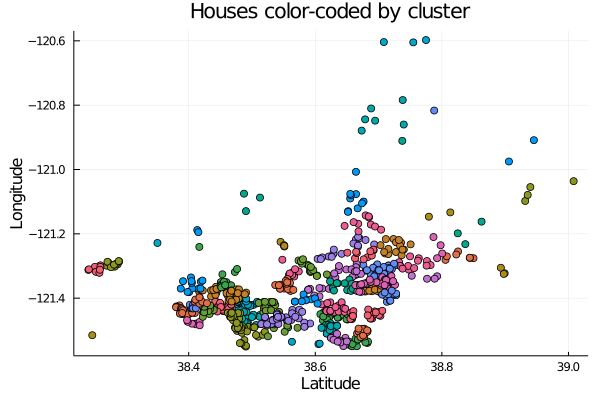

In [46]:
clusters_figure = plot(legend = false)
for i = 1:k
    clustered_houses = df[df[!,:cluster].== i,:]
    xvals = clustered_houses[!,:latitude]
    yvals = clustered_houses[!,:longitude]
    scatter!(clusters_figure,xvals,yvals,markersize=4)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by cluster")
display(clusters_figure)

<b>Построим график, раскрасив кластеры по почтовому индексу:</b>

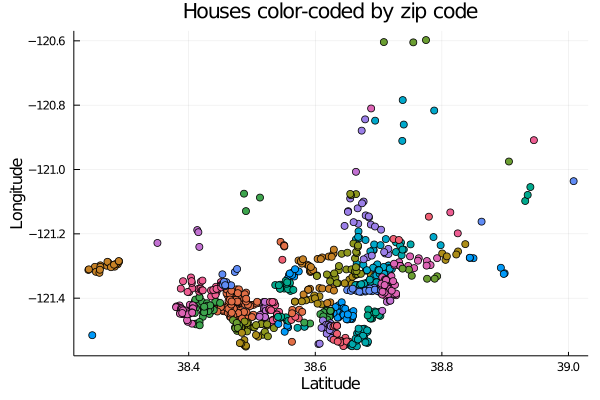

In [47]:
unique_zips = unique(filter_houses[!,:zip])
zips_figure = plot(legend = false)
for uzip in unique_zips
    subs = filter_houses[filter_houses[!,:zip].==uzip,:]
    x = subs[!,:latitude]
    y = subs[!,:longitude]
    scatter!(zips_figure,x,y)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by zip code")
display(zips_figure)

<br><h3><b>Кластеризация данных. Метод k ближайших соседей</b></h3>

<b>Данный метод заключается в отнесении объекта к тому из известных классов, который
является наиболее распространённым среди k соседей данного элемента. В случае исполь-
зования метода для регрессии, объекту присваивается среднее значение по k ближайшим
к нему объектам.
Рассмотрим использование метода k ближайших соседей на примере того же файла
с данными об объектах недвижимости в Сакраменто.</b>

In [83]:
# Подключение пакета NearestNeighbors:
import Pkg
Pkg.add("NearestNeighbors")
using NearestNeighbors
# Найдём k-среднее одного из объектов недвижимости:
knearest = 10
id = 70
point = X[:,id]

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


2-element Array{Float64,1}:
   38.44004
 -121.421012

In [84]:
# Поиск ближайших соседей:
kdtree = KDTree(X)
idxs, dists = knn(kdtree, point, knearest, true)

([70, 764, 196, 125, 557, 368, 415, 92, 112, 683], [0.0, 0.006264891539364138, 0.00825320259050462, 0.008473585132630057, 0.009164073548370186, 0.009405065124697706, 0.00992175972295076, 0.009941028618812013, 0.010332637707777167, 0.011168993911721985])

<b>Определим ближайших соседей:</b>

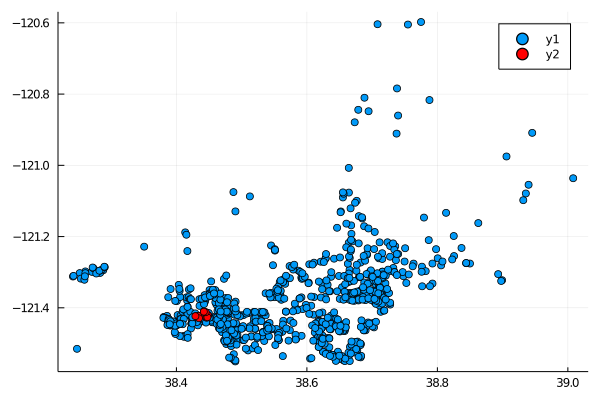

In [218]:
# Все объекты недвижимости:
x = filter_houses[!,:latitude];
y = filter_houses[!,:longitude];
scatter(x,y)
# Соседи:
x = filter_houses[idxs,:latitude];
y = filter_houses[idxs,:longitude];
scatter!(x,y, c = :red)

In [206]:
# Фильтрация по районам соседних домов:
cities = filter_houses[idxs,:city]

10-element Array{String,1}:
 "SACRAMENTO"
 "ELK GROVE"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"

<br><h3><b>Обработка данных. Метод главных компонент</b></h3>

<b>Метод главных компонент (Principal Components Analysis, PCA) позволяет уменьшить раз-
мерность данных, потеряв наименьшее количество полезной информации. Метод имеет
широкое применение в различных областях знаний, например, при визуализации дан-
ных, компрессии изображений, в эконометрике, некоторых гуманитарных предметных
областях, например, в социологии или в политологии.
На примере с данными о недвижимости попробуем уменьшить размеры данных о цене
и площади из набора данных домов</b>

In [220]:
# Фрейм с указанием площади и цены недвижимости:
F = filter_houses[[:sqft,:price]]
# Конвертация данных в массив:
F = convert(Array{Float64,2},F)'

2×814 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
   836.0   1167.0    796.0    852.0    797.0  …    1216.0    1685.0    1362.0
 59222.0  68212.0  68880.0  69307.0  81900.0     235000.0  235301.0  235738.0

In [200]:
# Подключение пакета MultivariateStats:
import Pkg
Pkg.add("MultivariateStats")
using MultivariateStats

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [201]:
# Приведение типов данных к распределению для PCA:
M = fit(PCA, F)

PCA(indim = 2, outdim = 1, principalratio = 0.9999840784692097)

<b>Далее используем специальную функцию fit и приведём имеющийся набор данных
к распределению, к которому можно применить метод главных компонент (PCA):</b>

In [223]:
# Приведение типов данных к распределению для PCA:
M = fit(PCA, F)

PCA(indim = 2, outdim = 1, principalratio = 0.9999840784692097)

In [ ]:
# Выделение значений главных компонент в отдельную переменную:
Xr = reconstruct(M, y)

<br><h3><b>Обработка данных. Линейная регрессия</b></h3>

<b>Зададим случайный набор данных (можно использовать и полученные эксперимен-
тальным путём какие-то данные). Попробуем найти для данных лучшее соответствие:</b>

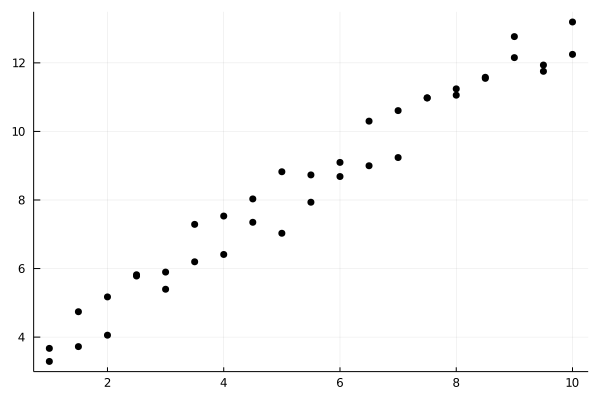

In [226]:
xvals = repeat(1:0.5:10,inner=2)
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1
scatter(xvals,yvals,color=:black,leg=false)

<b>Определим функцию линейной регрессии:</b>

In [227]:
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
end

find_best_fit (generic function with 1 method)

<b>Применим функцию линейной регрессии для построения соответствующего графика
значений</b>

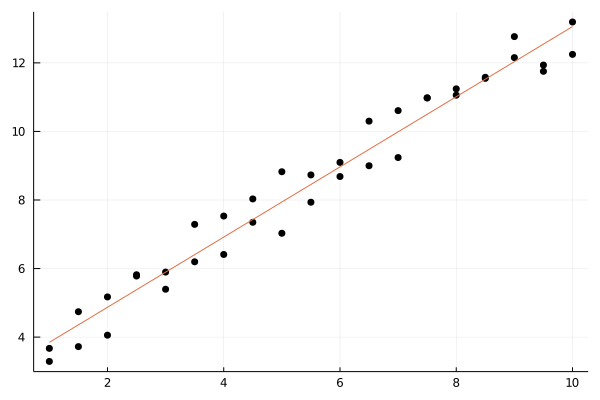

In [228]:
a,b = find_best_fit(xvals,yvals)
ynew = a * xvals .+ b
plot!(xvals,ynew)

In [229]:
# Сгенерируем больший набор данных:
xvals = 1:100000;
xvals = repeat(xvals,inner=3);
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1;

In [230]:
@show size(xvals)
@show size(yvals)

size(xvals) = (300000,)
size(yvals) = (300000,)


(300000,)

<b>Определим, сколько времени потребуется, чтобы найти соответствие этим данным:</b>

In [233]:
@time a,b = find_best_fit(xvals,yvals)

  0.002558 seconds (5 allocations: 128 bytes)


(0.9999999801456347, 3.0004469146297197)

<b>Для сравнения реализуем подобный код на языке Python:</b>

In [239]:
import Pkg
Pkg.add("PyCall")
Pkg.add("Conda")
using PyCall
using Conda

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [248]:
py"""
import numpy
def find_best_fit_python(xvals,yvals):
    meanx = numpy.mean(xvals)
    meany = numpy.mean(yvals)
    stdx = numpy.std(xvals)
    stdy = numpy.std(yvals)
    r = numpy.corrcoef(xvals,yvals)[0][1]
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
"""
xpy = PyObject(xvals)
ypy = PyObject(yvals)
@time a,b = py"find_best_fit_python"(xpy,ypy)

  0.010483 seconds (23 allocations: 592 bytes)


(0.9999999801456371, 3.0004469145133044)

In [250]:
import Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [251]:
@btime a,b = py"find_best_fit_python"(xvals,yvals)
@btime a,b = find_best_fit(xvals,yvals)

  8.553 ms (31 allocations: 1.17 KiB)
  2.253 ms (1 allocation: 32 bytes)


(0.9999999801456347, 3.0004469146297197)

<b>Как мы можем видеть, код на Julia исполняется в 4 раза быстрее</b>

<b><h2>Самостоятельная работа</h2><br><h3>Кластеризация на основе k-средних</h3></b>

In [2]:
using RDatasets, DataFrames, Clustering, Plots # Подготовим окружение

iris = dataset("datasets", "iris") |> DataFrame # Загрузим данные

150×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species   │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Cat…      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ setosa    │
⋮
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ virginica │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ virginica │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ virginica │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ virginica │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ virginica │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ virginica │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ virginica │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ virginica │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ virginica │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ virginica │

<b>Рассмотрим данные:</b>

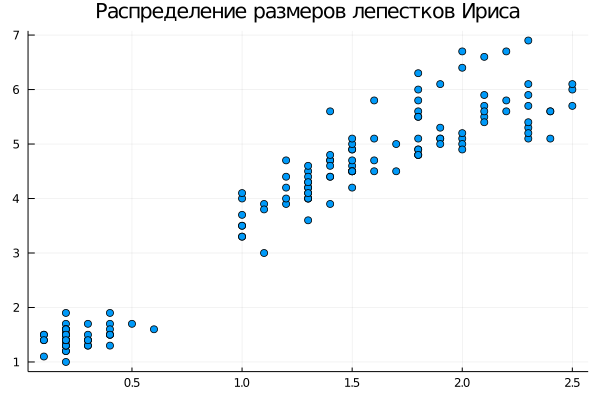

In [4]:
scatter(iris[!,:PetalWidth], iris[!,:PetalLength],
        title = "Распределение размеров лепестков Ириса",
        leg = false)

<b>Рассмотрим распределение значений:</b>

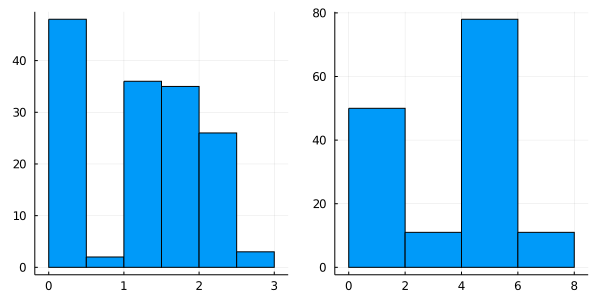

In [6]:
p1 = histogram(iris[!,:PetalWidth], leg = false)
p2 = histogram(iris[!,:PetalLength], leg = false)
plot(p1, p2, size = (600,300))

<b>Предварительно можем заметить что данные разделены минимум на 2 кластера<br>Займёмся кластеризацией:</b3>

In [7]:
k = length(unique(iris[!,:Species])) # Посчитаем количество кластеров по количеству видов растения
X = iris[[:PetalLength,:PetalWidth]] # Создадим DataFrame с шириной и длинной лепестков
X = convert(Matrix{Float64}, X) # Конвертируем DataFrame в матрицу
X = X' # Транспонируем матрицу
C = kmeans(X,k); # Найдём средние точки

<b>Создаём df содержащий номер кластера, вид растения, и размеры лепестков</b3>

In [8]:
df = DataFrame(cluster = C.assignments, species = iris[!,:Species],
        length = iris[!,:PetalLength], width = iris[!,:PetalWidth])

150×4 DataFrame
│ Row │ cluster │ species   │ length  │ width   │
│     │ Int64   │ Cat…      │ Float64 │ Float64 │
├─────┼─────────┼───────────┼─────────┼─────────┤
│ 1   │ 2       │ setosa    │ 1.4     │ 0.2     │
│ 2   │ 2       │ setosa    │ 1.4     │ 0.2     │
│ 3   │ 2       │ setosa    │ 1.3     │ 0.2     │
│ 4   │ 2       │ setosa    │ 1.5     │ 0.2     │
│ 5   │ 2       │ setosa    │ 1.4     │ 0.2     │
│ 6   │ 2       │ setosa    │ 1.7     │ 0.4     │
│ 7   │ 2       │ setosa    │ 1.4     │ 0.3     │
│ 8   │ 2       │ setosa    │ 1.5     │ 0.2     │
│ 9   │ 2       │ setosa    │ 1.4     │ 0.2     │
│ 10  │ 2       │ setosa    │ 1.5     │ 0.1     │
⋮
│ 140 │ 1       │ virginica │ 5.4     │ 2.1     │
│ 141 │ 1       │ virginica │ 5.6     │ 2.4     │
│ 142 │ 1       │ virginica │ 5.1     │ 2.3     │
│ 143 │ 1       │ virginica │ 5.1     │ 1.9     │
│ 144 │ 1       │ virginica │ 5.9     │ 2.3     │
│ 145 │ 1       │ virginica │ 5.7     │ 2.5     │
│ 146 │ 1       │ virginica │ 5.2     │ 2.3     │
│ 147 │ 1       │ virginica │ 5.0     │ 1.9     │
│ 148 │ 1       │ virginica │ 5.2     │ 2.0     │
│ 149 │ 1       │ virginica │ 5.4     │ 2.3     │
│ 150 │ 1       │ virginica │ 5.1     │ 1.8     │

<b>Визуализируем кластеризацию:</b3>

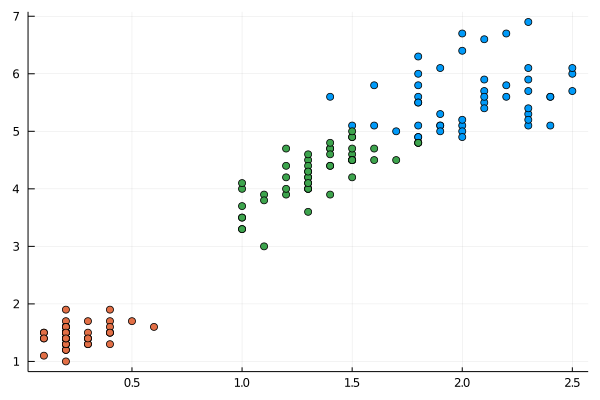

In [9]:
clusters_figure = plot(legend = false)
for i = 1:k
        clustered_iris = df[df[!,:cluster].== i,:]
        xvals = clustered_iris[!,:width]
        yvals = clustered_iris[!,:length]
        scatter!(clusters_figure,xvals,yvals,markersize=4)
end
display(clusters_figure)

<b>Посмторим на разделение по виду растения:</b>

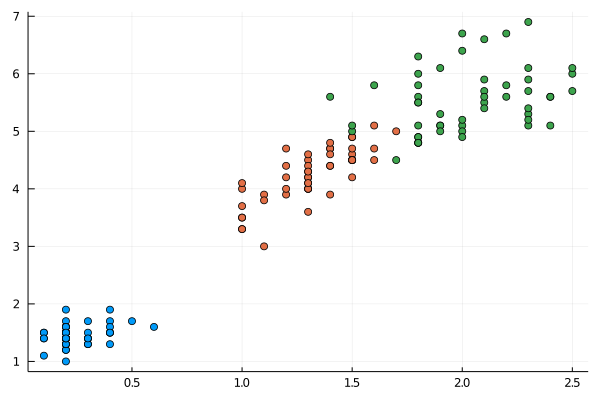

In [10]:
unique_species = unique(iris[!,:Species])
species_figure = plot(legend = false)
for usp in unique_species
        subs = iris[iris[!,:Species] .== usp,:]
        x = subs[!,:PetalWidth]
        y = subs[!,:PetalLength]
        scatter!(species_figure,x,y)
end
display(species_figure)

<b>Вывод: наша кластеризация на основе k-средних удалась. Она отличается от истинного разделения на основе сорта растения, но это известная погрешность данного способа. Данные способ позволяет нам кластеризировать (упростить) данные для анализа, потеряв при этом точность</b>

<h3><b>Регрессия (метод наименьших квадратов в случае линейной регрессии)</b></h3>

In [38]:
using MultivariateStats, GLM

X = randn(1000, 3)
a0 = rand(3)
y = X * a0 + 0.1 * randn(1000);

<b>Линейная регрессионная модель описывается уравнением кривой Y = kx + b<br>Для того чтобы её решить нам необходимо данные преобразовать в матрицу, добавив столбец едениц. И решит систему уравнений</b>

In [39]:
X2 = [ones(size(X)) X]
beta = X2\y

6-element Array{Float64,1}:
 0.0025955925423629005
 0.0025955925423629114
 0.0025955925423629005
 0.4260928630219306
 0.7300053528071769
 0.2104766303304671

<b>Как мы можем видеть первые три числа это свободные члены b, последующие три числа это коэффиценты крутизны прямой функции<br>Теперь воспользуемся библиотекой MultivariateStats.jl</b>

In [40]:
sol = llsq(X, y)

4-element Array{Float64,1}:
 0.42609286302193056
 0.7300053528071774
 0.21047663033046696
 0.0077867776270886665

<b>Как мы можем видеть, коэффиценьы крутизны функций одинаковые в обоих решениях. Четвёртое число это сумма свободных членов b<br>Воспользуемся библиотекой GLM.jl</b>

In [41]:
data = DataFrame(X = X[:, 1], Y = y)
probit = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.016806   0.0253803   0.66    0.5080  -0.0329988  0.0666108
X            0.407185   0.0253421  16.07    <1e-51   0.357455   0.456915
─────────────────────────────────────────────────────────────────────────

In [42]:
data = DataFrame(X = X[:, 2], Y = y)
probit = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00183729   0.0153912   0.12    0.9050  -0.0283655  0.0320401
X            0.706776     0.0143681  49.19    <1e-99   0.67858    0.734971
───────────────────────────────────────────────────────────────────────────

In [43]:
data = DataFrame(X = X[:, 3], Y = y)
probit = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.0342338   0.0280766  1.22    0.2230  -0.0208621  0.0893297
X            0.159933    0.0279934  5.71    <1e-7    0.105      0.214865
─────────────────────────────────────────────────────────────────────────

<b>Как мы можем видеть, коэффиценты библиотеки GLM отличаются не сильно <br>Часть 2 <br>Найдём линию регрессии</b>

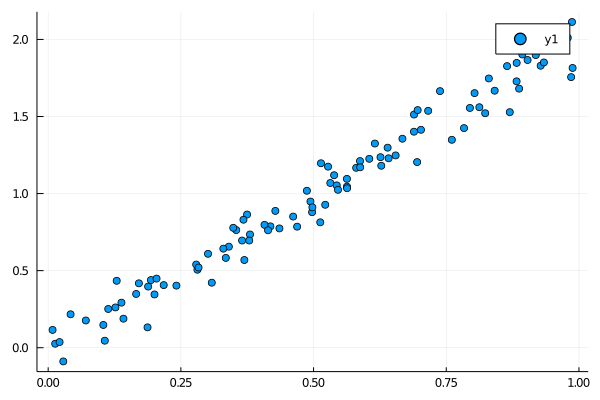

In [47]:
x = rand(100); # Создаём массив
y = 2*x + 0.1 * randn(100);
scatter(x, y)

<b>Найдём коэффиценты прямой:</b>

In [48]:
x2 = [ones(size(x)) x]
beta = x2\y

2-element Array{Float64,1}:
 -0.018291469217826338
  2.003120493594235

<b>Строим прямую</b>

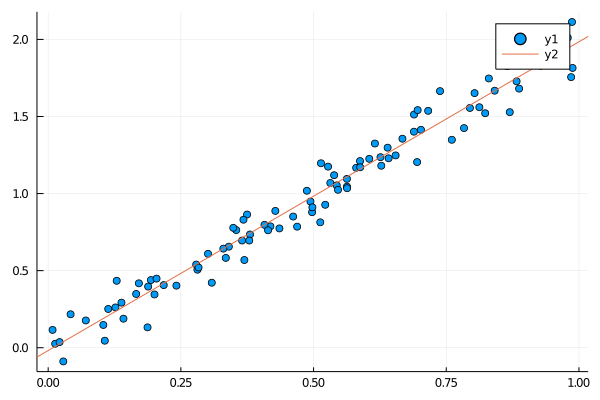

In [49]:
Plots.abline!(beta[2], beta[1])

<b>Подпишем:</b>

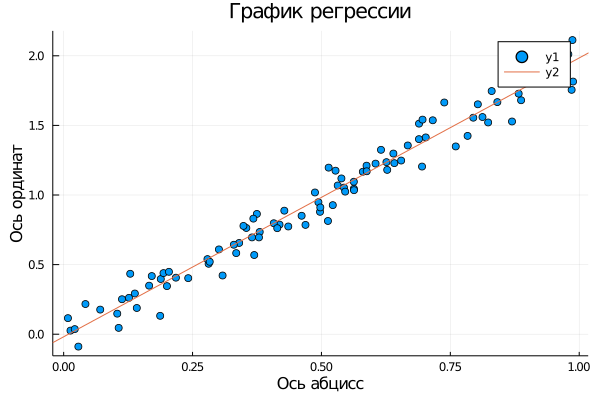

In [51]:
title!("График регрессии")
xlabel!("Ось абцисс")
ylabel!("Ось ординат")

<b><h3>Модель ценообразования биномиальных опционов</h3><br>Часть a<br>Подготовим:</b>

In [61]:
using Plots

S = 100 # начальная цена акции
T = 1  # длина биномиального дерева в годах
n = 10000 # количество периодов
σ = 0.3 # волатильность акции
r = 0.08 # годовая процентная ставка
h = T/n # длина одного периода

0.0001

<b>Построим траекторию курса акций</b>

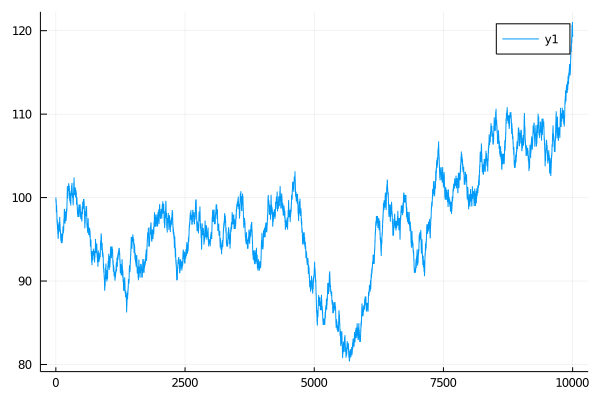

In [62]:
u = exp(r*h + σ*sqrt(h)) # Коэф увеличения цены
d = exp(r*h - σ*sqrt(h)) # Коэф понижения цены

p = (exp(r*h) - d)/ (u - d) # Шанс повышения цены

a = [100.0] # Начальная цена

for x in 1:n
    if rand() > p
        push!(a, a[end]*u)
    else
        push!(a, a[end]*d)
    end
end

plot(a)

<b>Часть b<br> Создаём функцию:</b>

In [72]:
function createPath(S::Number, r::Number, σ::Number, T::Number, n::Number)
    h = T/n
    u = exp(r*h + σ*sqrt(h))
    d = exp(r*h - σ*sqrt(h))

    p = (exp(r*h) - d)/ (u - d)

    a = [S]

    for x in 1:n
        if rand() > p
            push!(a, a[end]*u)
        else
            push!(a, a[end]*d)
        end
    end

    plot!(a, leg = false)
end

createPath (generic function with 3 methods)

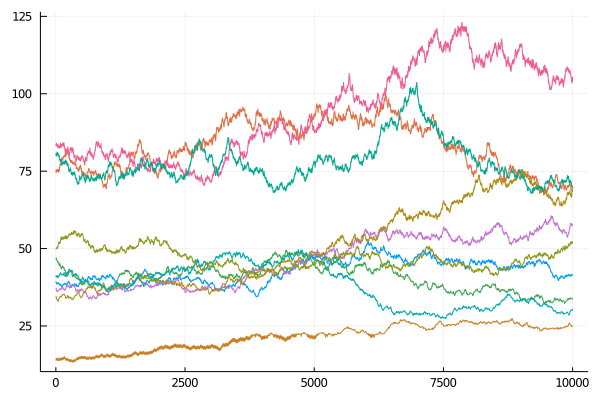

In [77]:
plot() # Очистим коор. плоскость
for x in 1:10
    createPath(100*rand(), r, σ, T, n)
end
plot!() # Посмотрим коор. плоскость

<b>Часть C<br>Параллельные вычиследния<b>

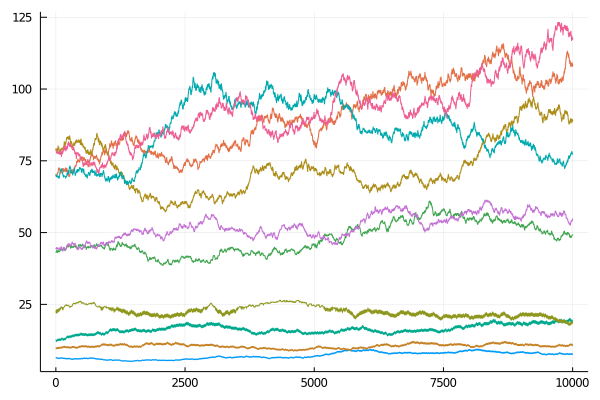

In [87]:
plot() # Очистим коор. плоскость
for x in 1:10
    Threads.@spawn createPath(100*rand(), r, σ, T, n)
end
<b>plot!() # Посмотрим коор. плоскость

<br><b>Вывод: в данной лабораторной работе мы приобрели практический опыт работы с библиотеками для обработки данных: "DataFrames", "CSV", "RDatasets", "FileIO" и "GLM". Воспользовались базовыми методами анализа данных: кластеризация и регрессионный анализ. Интегрировали python код и сравнили быстродействие, показали что julia более быстродейственный инструмент. Смоделировали и визиулазировали модель ценообразования биномиальных опционов.</b>